In [118]:
import pandas as pd
import spacy
import steamreviews
import json
import csv
import os
import glob
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import re
import plotly
import seaborn as sns
import stanza

## Reviews download
https://pypi.org/project/steamreviews/

In [119]:
dir_name = "data"
reviews_jsons = glob.glob(f"{dir_name}/*")
reviews_jsons

['data\\review_1150690.json',
 'data\\review_1172620.json',
 'data\\review_1341290.json',
 'data\\review_1515210.json',
 'data\\review_210970.json',
 'data\\review_219150.json',
 'data\\review_219890.json',
 'data\\review_250320.json',
 'data\\review_257510.json',
 'data\\review_262060.json',
 'data\\review_289070.json',
 'data\\review_294100.json',
 'data\\review_304430.json',
 'data\\review_394360.json',
 'data\\review_400.json',
 'data\\review_427520.json',
 'data\\review_460950.json',
 'data\\review_550.json',
 'data\\review_620.json',
 'data\\review_632470.json',
 'data\\review_646570.json',
 'data\\review_736260.json',
 'data\\review_860510.json']

In [120]:
title_dict = {"219150": "Hotline Miami",
              "1172620" : "Sea of Thieves",
              "460950" : "Katana ZERO",
              "262060" : "Darkest Dungeon",
              "250320" : "The Wolf Among Us",
              "210970" : "The Witness",
              "620" : "Portal 2",
              "736260" : "Baba Is You",
              "219890" : "Antichamber",
              "289070" : "Sid Meier's Civilization VI",
              "427520" : "Factorio",
              "257510" : "The Talos Principle",
             "304430" : "INSIDE",
             "400" : "Portal",
             "394360" : "Hearts of Iron IV",
             "632470" : "Disco Elysium",
             "294100" : "RimWorld",
              "646570" : "Slay the Spire",
              "1150690" : "Omori",
              "1341290" : "We Were Here Forever",
              "1515210" : "The Past Within",
              "860510" : "Little Nightmares II",
              "550" : "Left 4 Dead 2"}

In [121]:
genre_dict = {"219150": "A",
              "1172620" : "A",
              "460950" : "A",
              "262060" : "R",
              "250320" : "R",
              "210970" : "P",
              "620" : "P",
              "736260" : "P",
              "219890" : "P",
              "289070" : "S",
              "427520" : "S",
              "257510" : "P",
              "304430" : "P",
             "400" : "P",
             "394360" : "S",
             "632470" : "R",
             "294100" : "S",
             "646570" : "R",
             "1150690" : "R",
             "1341290" : "P",
             "1515210" : "P",
             "860510" : "P",
             "550" : "A"}

In [122]:
data_list = []
for i in reviews_jsons:
    with open(i, encoding = "utf-8") as json_file:
        json_data = json.load(json_file)
        reviews = json_data['reviews']
        file_name = json_file.name.split('.')[0].split('_')[1]
        for key in reviews.keys():
            data_list.append([title_dict.get(file_name),genre_dict.get(file_name),reviews[key]['author']['steamid'], reviews[key]['votes_up'], 
                          reviews[key]['review'], reviews[key]['weighted_vote_score'], reviews[key]['voted_up'],
                          reviews[key]['author']['num_games_owned'], reviews[key]['author']['playtime_at_review'],
                          reviews[key]['author']['num_reviews'], 
                          reviews[key]["timestamp_created"] ])
df = pd.DataFrame(data_list, columns = ["title", "genre","steamid", "votes_up", "review", "weighted_vote_score", "voted_up",
                                        "num_games_owned", "playtime_at_review", "num_reviews", "timestamp_created"])

## Wykresy

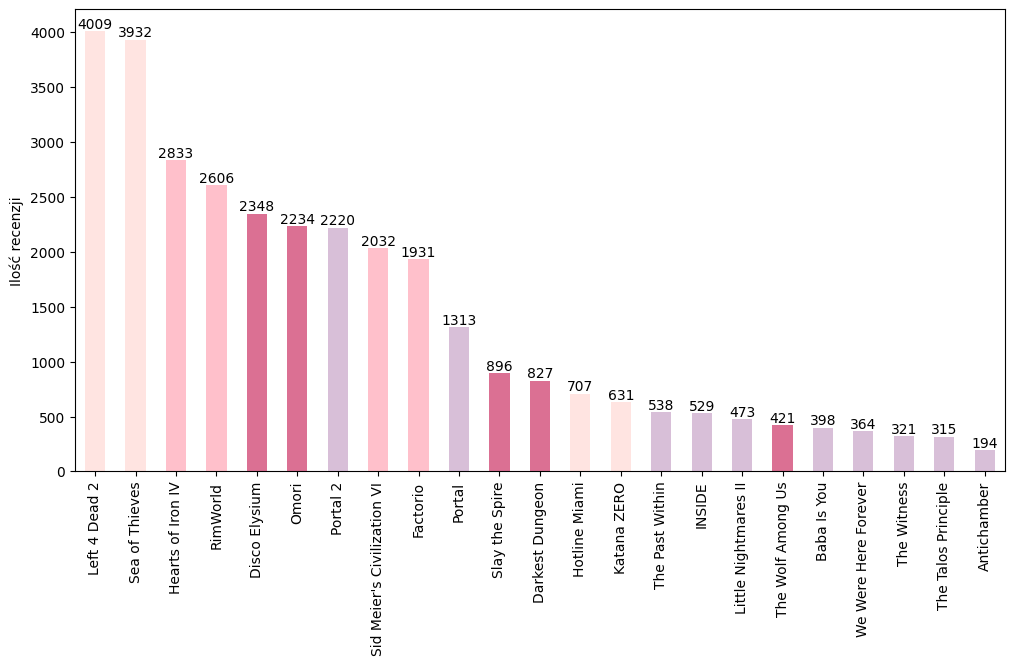

In [123]:
value_counts_title = df["title"].value_counts()
genre_colors = {"A": "mistyrose", "R": "palevioletred", "P": "thistle", "S": "pink"}
df['color'] = df['genre'].map(genre_colors)
colors = [df.loc[df['title'] == title]['color'].iloc[0] for title in value_counts_title.index]

plt.figure(figsize=(12, 6))
x = value_counts_title.plot(kind = "bar", color = colors)
plt.ylabel("Ilość recenzji")
plt.xticks(rotation = 90)
for i, count in enumerate(value_counts_title):
    x.text(i, count, count, va = "bottom", ha = "center")

plt.show()

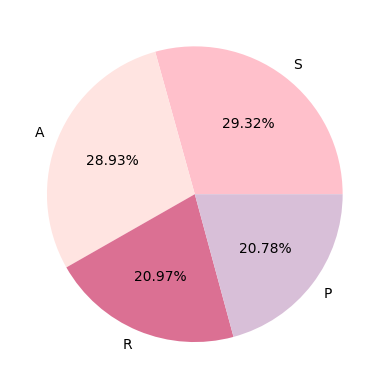

In [124]:
value_counts_genre = df["genre"].value_counts()
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
x = plt.pie(value_counts_genre, labels = value_counts_genre.index, colors=colors, autopct='%1.2f%%')
plt.show()

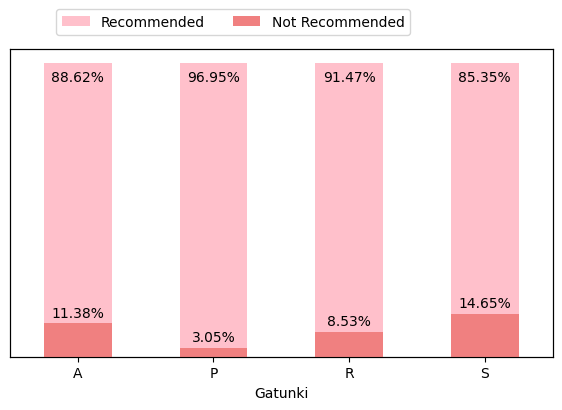

In [196]:
percentage_pos = value_counts_recommendation_genre.iloc[1] / (value_counts_recommendation_genre.iloc[1] + value_counts_recommendation_genre.iloc[0]) * 100 
percentage_neg = value_counts_recommendation_genre.iloc[0] / (value_counts_recommendation_genre.iloc[0] + value_counts_recommendation_genre.iloc[1]) * 100 

total_count = percentage_pos + percentage_neg

def addlabels_neg(x,y):
    for i in range(len(y)):
        plt.text(i, x[i] + 2, f"{x[i]:.2f}%",  ha = "center")

def addlabels_pos(x,y):
    for i in range(len(y)):
        plt.text(i, x[i] - 6, f"{y[i]:.2f}%",  ha = "center")

fig, ax1 = plt.subplots(figsize=(7, 4))
ax2 = ax1.twinx()

total_count.plot(kind="bar", color="pink",  label="Recommended")
percentage_neg.plot(kind="bar", color="lightcoral", label="Not Recommended")

ax1.set_xlabel("Gatunki")
ax1.tick_params(axis="y", left=False, labelleft=False)
ax2.tick_params(axis="y", right=False, labelright=False)

addlabels_neg(percentage_neg, total_count) 
addlabels_pos(total_count, percentage_pos) 

plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

In [128]:
df.sample(frac=0.3).head()

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
27522,Portal 2,P,76561198274280761,2,HAHA CHAMBEr 10 IS NOOB,0.52173912525177002,True,0,44388,1,1665388688,thistle
26465,Portal 2,P,76561198358243791,1,pretty good game\nplayed it 5 times going for 10,0.523809552192687988,True,101,3508,3,1683856043,thistle
28400,Disco Elysium,R,76561198059971364,3,Finally I can be racist besides on Discord :DD...,0.547692298889160156,True,260,1808,5,1683347575,palevioletred
19123,Portal,P,76561198367467273,69,Buy it. For science. You monster.,0.794758915901184082,True,280,1570,25,1625394246,thistle
23693,Left 4 Dead 2,A,76561199211792573,1,good way to shoot something without going to j...,0.523809552192687988,True,15,6348,1,1675128339,mistyrose


In [129]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

## Preprocessing

1. Braki danych
2. Usunięcie duplikatów
4. Usunięcie recenzjii krótszych niż 3 słowa
9. Usunięcie znaków spcjalnych 
10. "Text lowering"
6. Usunięcie znaków interpunkcyjnych i liczb
7. Tokenizacja
8. Part-of-speech tagging
9. Lematyzacja

#### Braki danych

In [130]:
df.isna().sum()

title                  0
genre                  0
steamid                0
votes_up               0
review                 0
weighted_vote_score    0
voted_up               0
num_games_owned        0
playtime_at_review     0
num_reviews            0
timestamp_created      0
color                  0
dtype: int64

#### Usunięcie duplikatów

In [131]:
df.duplicated(subset='review').sum()

2580

In [132]:
df[df.duplicated(subset='review')].sample(59)

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
14077,RimWorld,S,76561198254875470,1,it's alright,0.514285683631896973,True,0,33410,4,2022-11-25 01:29:14,pink
10565,Sid Meier's Civilization VI,S,76561199092724665,1,good,0.523809552192687988,True,0,187,7,2023-02-24 11:43:51,pink
10559,Sid Meier's Civilization VI,S,76561198963845303,1,good game,0.523809552192687988,True,98,311,31,2023-02-26 00:14:13,pink
3387,Sea of Thieves,A,76561199005504152,1,boat,0.523809552192687988,True,0,4520,3,2023-07-07 23:12:18,mistyrose
22981,Left 4 Dead 2,A,76561197967396758,1,i like it,0.523809552192687988,True,0,275,25,2023-06-10 23:18:25,mistyrose
27689,Portal 2,P,76561198329995632,1,please add sex,0.512820541858673096,True,329,537,65,2022-10-19 06:05:17,thistle
25249,Left 4 Dead 2,A,76561199222031035,1,FUN,0.514592766761779785,True,26,874,1,2023-06-15 23:18:11,mistyrose
10217,Sid Meier's Civilization VI,S,76561198108341834,1,.,0.525862038135528564,True,0,9299,1,2023-02-20 17:48:57,pink
19964,Factorio,S,76561198967779780,1,great game,0.523809552192687988,True,0,9052,5,2023-04-29 06:38:07,pink
1920,Omori,R,76561199022927094,1,miserable,0.505494534969329834,True,36,1353,8,2023-03-27 20:14:52,palevioletred


In [133]:
(df.duplicated(subset='review') == False).sum()

29492

In [134]:
df = df[df.duplicated(subset='review') == False]

In [135]:
df.duplicated(subset='review').sum()

0

#### Długość recenzji

In [136]:
df["temp_review_len"] = df["review"].apply(lambda x: x.split(" ").__len__())
df["temp_review_len"].describe()

count    29492.000000
mean        54.191984
std        135.354534
min          1.000000
25%          5.000000
50%         13.000000
75%         39.000000
max       3997.000000
Name: temp_review_len, dtype: float64

In [137]:
df[df["temp_review_len"] == df["temp_review_len"].max()]['review'].values

array(['t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y 

In [138]:
df[df["temp_review_len"] < 4].groupby(by=["genre"]).count()

,title,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color,temp_review_len
genre,,,,,,,,,,,,
A,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659
P,852,852,852,852,852,852,852,852,852,852,852,852
R,798,798,798,798,798,798,798,798,798,798,798,798
S,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140


In [139]:
df = df[df["temp_review_len"] >= 3]

In [140]:
suma = 0
for i in df["temp_review_len"]:
    suma += i

In [141]:
print("Ilość słów:", suma,
     "Ilość recenzji:", len(df["temp_review_len"]))

Ilość słów: 1593992 Ilość recenzji: 26663


In [142]:
df = df.drop(["temp_review_len"], axis=1)

### Wordcloud

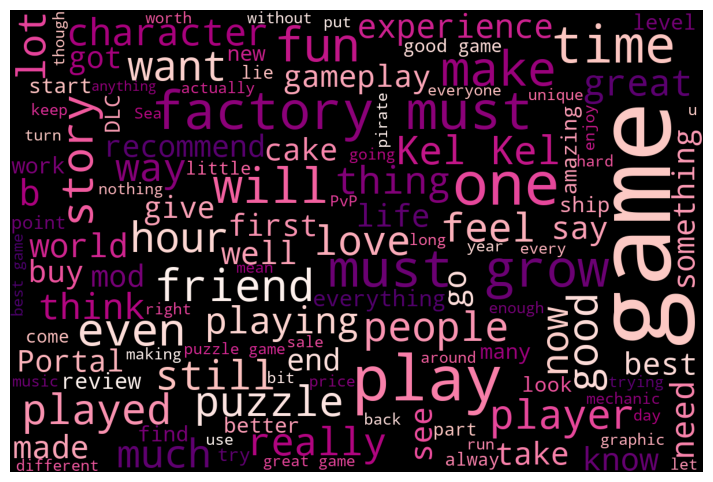

In [143]:
txt = ' '.join(i for i in df["review"])
wordcloud = WordCloud(max_font_size = 180,
                max_words = 120,
                width = 1200,
                height = 800,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

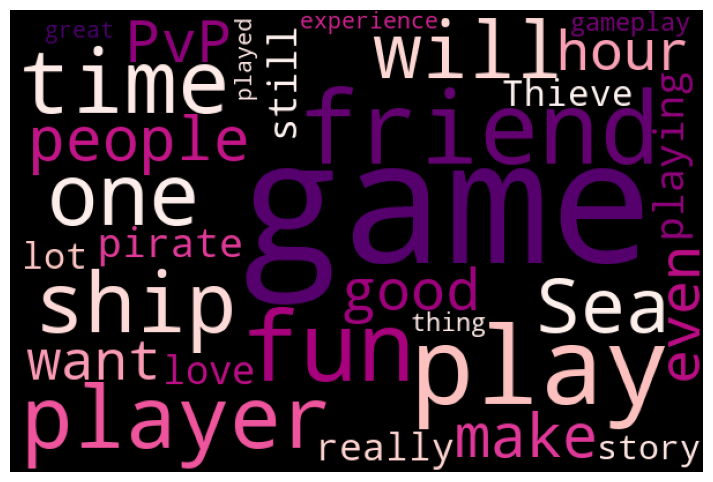

In [144]:
txt = ' '.join(i for i in df[df['genre'] == "A"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

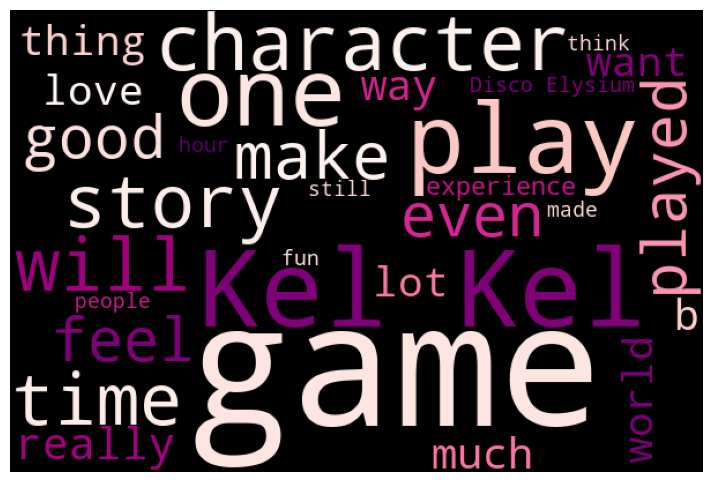

In [145]:
txt = ' '.join(i for i in df[df['genre'] == "R"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

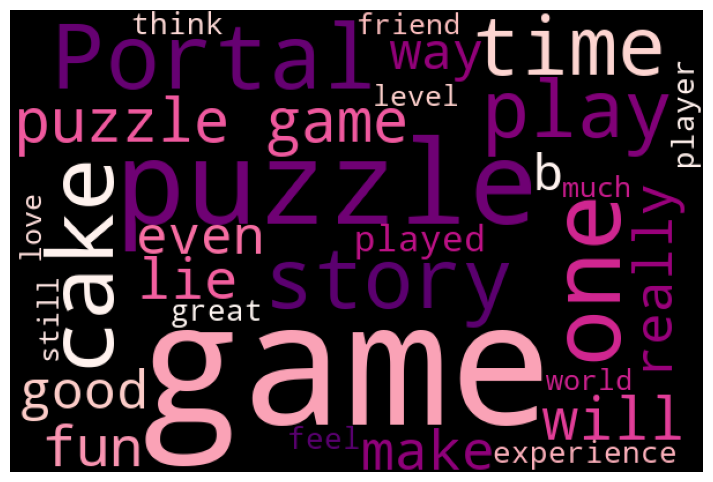

In [146]:
txt = ' '.join(i for i in df[df['genre'] == "P"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

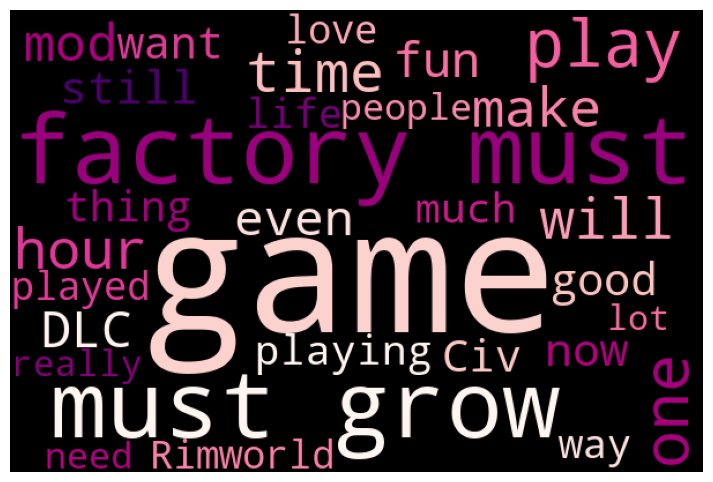

In [147]:
txt = ' '.join(i for i in df[df['genre'] == "S"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Usunięcie znaków, text lowering

In [148]:
df["review"] = df["review"].str.replace(r"\[.*?\]|\n|[^\x00-\x7F]+", "", regex=True).str.lower()

In [149]:
df["review"].sample(10)

31281                                   baba is me and you
18088          fun game, hard at times, but real good game
19552    inflation review update: i originally bought t...
30597         mobs so icy im just balling bruh im drowning
16367    its like a box of chocolates, you never know w...
10835    i have over fifty years of playing war games, ...
5674                                         piece of shit
9991     thumbs down to this game for several reasons. ...
13151    good game for spectating what your friends are...
30199    so only played 90 minutes but i'm already floo...
Name: review, dtype: object

#### Usunięcie znaków interpunkcyjnych i liczb

In [150]:
df["review"] = df["review"].str.replace(r"[0-9]", "", regex=True)

In [151]:
import string 
df["review"] = df["review"].str.replace('['  + string.punctuation + ']', "", regex =True)

In [152]:
df["review"].sample(5)

1328     game about depression so quirky uwushut the fu...
12874                                 can eat people whole
27958    the greatest rpg of all time stolen by con art...
12354    thanks for the ridiculous price increase for t...
11195    its was good game  wonderful game and maybe it...
Name: review, dtype: object

#### Usunięcie tytułów gier z recenzji

In [153]:
for value in title_dict.values():
    df["review"] = df["review"].str.replace(value.lower(), "")

#### Tokenizacja

In [154]:
import nltk
df["tokenized"] = df["review"].apply(nltk.word_tokenize)

In [155]:
df["tokenized"].sample(15)

4183     [verry, good, game, its, not, all, about, the,...
24254    [this, game, is, gudbut, i, still, wan, na, di...
107      [when, i, first, played, the, game, i, got, to...
7593                                   [i, love, violence]
20818                         [amazing, instantly, hooked]
16309    [ever, wanted, to, be, a, discord, mod, well, ...
10586                       [i, can, kill, my, friends, d]
9633     [this, is, a, great, game, as, long, as, you, ...
29430    [people, are, beautiful, statuesque, parodies,...
10088    [amazing, game, to, sink, many, hours, of, you...
24496    [this, game, kept, me, alive, through, the, en...
31988    [this, is, a, gem, of, world, building, and, a...
14393    [ive, been, fiddling, around, with, challengin...
1177     [yes, dont, second, guess, buying, this, game,...
7232     [its, quite, possibly, the, greatest, and, mos...
Name: tokenized, dtype: object

#### Stopwords

In [156]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
english_stopwords_cleaned = [word.replace("'", "") for word in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
new_column = []
for row in df["tokenized"]:
    new_row = [word for word in row if word[0] not in english_stopwords_cleaned]
    new_column.append(new_row)
df["final_review"] = new_column

#### Describe

In [158]:
df.dtypes

title                          object
genre                          object
steamid                        object
votes_up                        int64
review                         object
weighted_vote_score            object
voted_up                         bool
num_games_owned                 int64
playtime_at_review              int64
num_reviews                     int64
timestamp_created      datetime64[ns]
color                          object
tokenized                      object
final_review                   object
dtype: object

In [159]:
df["weighted_vote_score"] = pd.to_numeric(df["weighted_vote_score"])

In [160]:
df["voted_up"] = pd.to_numeric(df["voted_up"])

In [161]:
df.describe()

,votes_up,weighted_vote_score,num_games_owned,playtime_at_review,num_reviews
count,26663.000000,26663.000000,26663.000000,2.666300e+04,26663.000000
mean,31.715148,0.570098,140.866707,1.309372e+04,21.467689
std,173.097223,0.109932,538.652824,4.720263e+04,59.809381
min,0.000000,0.500000,0.000000,5.000000e+00,1.000000
25%,1.000000,0.521739,0.000000,5.350000e+02,3.000000
50%,1.000000,0.523810,0.000000,1.800000e+03,8.000000
75%,3.000000,0.545180,113.000000,7.111500e+03,20.000000
max,9568.000000,0.987843,22780.000000,1.890626e+06,3419.000000


C:\Users\marty\AppData\Local\Temp\ipykernel_16176\2159658958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


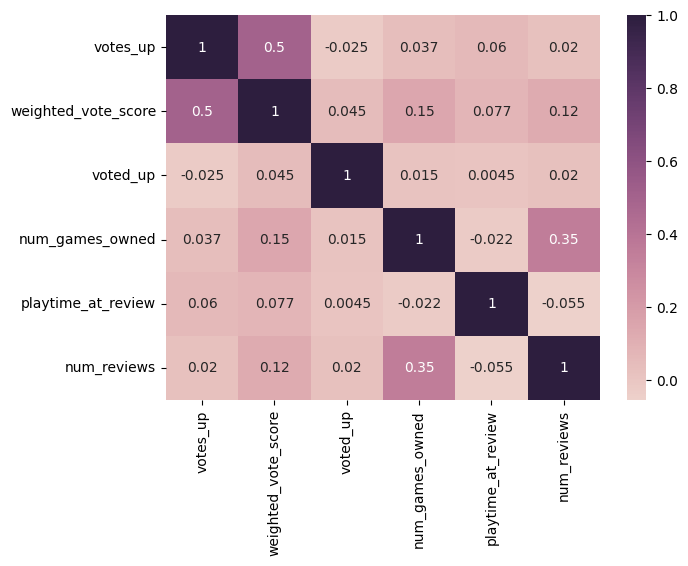

In [162]:
corr = df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True),annot=True)
plt.show()

## Dependency parser test

In [163]:
test = [df["final_review"][6543], df["final_review"][4534], df["final_review"][12345], df["final_review"][12354],
        df["final_review"][1925], df["final_review"][1067],df["final_review"][22951],df["final_review"][2231],
       ["not","fun", "gameplay"], df["tokenized"][832], df["final_review"][21]]

In [164]:
import stanza
nlp = stanza.Pipeline('en', tokenize_pretokenized=True) 
doc = nlp(test)

2024-04-12 23:59:03 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-12 23:59:04 INFO: Downloaded file to C:\Users\marty\stanza_resources\resources.json
2024-04-12 23:59:05 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-04-12 23:59:05 INFO: Using device: cuda
2024-04-12 23:59:05 INFO: Loading: tokenize
2024-04-12 23:59:05 INFO: Loading: mwt
2024-04-12 23:59:06 INFO: Loading: pos
2024-04-12 23:59:06 INFO: Loading: lemma
2024-04-12 23:59:06 INFO: Loading: constituency
2024-04-12 23:59:07 INFO: Loading: depparse
2024-04-12 23:59:07 INFO: Loading: sentiment
2024-04-12 23:59:07 INFO: Loading: ne

In [165]:
dependency_list = []
for dependency in doc.sentences[8].dependencies:
    dependency_list.append([dependency[2].text, dependency[0].id, dependency[1]])
    
for i in range(0, len(dependency_list)):
    if (int(dependency_list[i][1]) != 0):
        dependency_list[i][1] = test[8][(int(dependency_list[i][1]) - 1)]

print(dependency_list)

[['not', 'gameplay', 'advmod'], ['fun', 'gameplay', 'amod'], ['gameplay', 0, 'root']]


In [166]:
feature_list = []
feature_opinion_list = [] 

for dependency in doc.sentences[8].dependencies:
    if dependency[2].xpos == "RB":
        opinion_word = dependency[2]
        rb_adj = dependency[0]
        
    if (dependency[2].xpos in ["NN", "NNS", "JJ", "JJS", "JJR"]) and (dependency[1] in ["amod"]):
        if dependency[0] == rb_adj or dependency[2] == rb_adj:
            if dependency[2].xpos in ["JJS", "JJR"]:
                result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].text}
            else:
                result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].lemma}     
        else:
            if dependency[2].xpos in ["JJS", "JJR"]:
                result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].text}
            else:
                result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].lemma}  

        feature_list.append(dependency[0].lemma)
        feature_opinion_list.append(result_dict)

print(f'Feature list: {feature_list}')
print(f'Feature-opinion list: {feature_opinion_list}')

Feature list: ['gameplay']
Feature-opinion list: [{'feature': 'gameplay', 'opinion': 'not fun'}]


## Dependency parser final

In [167]:
feature_list_column = []
feature_opinion_list_column = []

for review in df["final_review"][1722:1735]:
    if isinstance(review, list):
        review = " ".join(review)
        doc = nlp(review)
        feature_list = []
        feature_opinion_list = [] 
        
        if len(doc.sentences) == 0:
            continue
            
        for dependency in doc.sentences[0].dependencies:
            if dependency[2].xpos == "RB":
                opinion_word = dependency[2]
                rb_adj = dependency[0]
            if (dependency[2].xpos in ["JJ", "JJS"]) and (dependency[0].xpos in ["NN", "NNS"]) and (dependency[1] in ["amod"]):

                if dependency[0] == rb_adj or dependency[2] == rb_adj:
                    if dependency[2].xpos in ["JJS", "JJR"]:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].text}
                    else:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].lemma}     
                else:
                    if dependency[2].xpos in ["JJS", "JJR"]:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].text}
                    else:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].lemma}  

                feature_list.append(dependency[0].lemma)
                feature_opinion_list.append(result_dict)
        print(feature_opinion_list)
                
    feature_list_column.append(feature_list)
    feature_opinion_list_column.append(feature_opinion_list)

[]
[{'feature': 'undertale', 'opinion': 'earthbound'}, {'feature': 'game', 'opinion': 'great'}, {'feature': 'job', 'opinion': 'favorite'}, {'feature': 'job', 'opinion': 'great'}, {'feature': 'ending', 'opinion': 'crazy'}, {'feature': 'ending', 'opinion': 'complete'}, {'feature': 'nikki', 'opinion': 'earthbound'}, {'feature': 'part', 'opinion': 'favorite'}, {'feature': 'game', 'opinion': 'worth'}]
[]
[{'feature': 'experience', 'opinion': 'vain'}, {'feature': 'narrative', 'opinion': 'fun'}, {'feature': 'narrative', 'opinion': 'colourful'}, {'feature': 'game', 'opinion': 'psychological'}, {'feature': 'game', 'opinion': 'bright'}, {'feature': 'game', 'opinion': 'cheery'}, {'feature': 'game', 'opinion': 'flat'}, {'feature': 'everyone', 'opinion': 'comfortable'}, {'feature': 'rpg', 'opinion': 'fairly fresh'}, {'feature': 'beating', 'opinion': 'happy'}, {'feature': 'box', 'opinion': 'very unique'}, {'feature': 'hit', 'opinion': 'good'}, {'feature': 'effect', 'opinion': 'unique'}, {'feature': 

In [168]:
##"VBG", "DT"